# Sparse Hebbian Learning: basics

We are interested here in learning the "optimal" components of a set of images (let's say some "natural", usual images). As there is no supervisor to guide the learning, this is called unsupervised learning. Our basic hypothesis to find the best ("optimal") components will be to assume that *a priori* the most sparse is more plausible. We will implement the derived algorithm in this set of scripts.

Here, we will show the basic operations that are implemented in this package. 

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
np.set_printoptions(precision=4, suppress=True)

## experiments

To test and control for the role of different parameters, we will have a first object (in the [shl_experiments.py](https://github.com/bicv/SHL_scripts/blob/master/shl_scripts/shl_experiments.py) script) that controls a learning experiment. It contains all relevant parameters, but can also keep a trace of the history of some statistics. This is useful to compare the relative efficiency of the different solutions.


In [3]:
tag = 'coding'
homeo_methods = ['None', 'HAP', 'HEH']


record_num_batches = 2**12

seed = 42
np.random.seed(seed)

from shl_scripts.shl_experiments import SHL
shl = SHL()
data = shl.get_data(matname=tag + '_test')
indx = np.random.permutation(data.shape[0])[:record_num_batches]

list_figures = []

dico = {}
for homeo_method in homeo_methods:
    print(19*'🐶' + homeo_method + 10*'🐶')
    shl = SHL(homeo_method=homeo_method)
    dico[homeo_method] = shl.learn_dico(data=data, list_figures=list_figures, matname=tag + '_' + homeo_method)


🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶None🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶
🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶HAP🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶
🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶HEH🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶


## distance to the Factorization of the coefficients

In [4]:
from shl_scripts.shl_tools import plot_P_cum


In [5]:
dico_ = dico[homeo_method]
P_cum = dico_.P_cum
P_cum_mean = P_cum.mean(axis=0)[np.newaxis, :] * np.ones((shl.n_dictionary, shl.nb_quant))
print(np.gradient(P_cum_mean[0, :]).shape, P_cum_mean.shape)
p_mean = np.gradient(P_cum_mean, axis=1)

p = np.gradient(P_cum, axis=1)
ymax = p.max()
print(ymax)

(128,) (441, 128)
0.9724724128667805


In [6]:
print('sum of proba', p.sum(axis=1))
print('sum of proba', p_mean.sum(axis=1))

sum of proba [1.4856 1.4845 1.4849 1.4854 1.4855 1.4841 1.4851 1.4855 1.4851 1.4848
 1.4851 1.4853 1.4854 1.4852 1.4855 1.4857 1.4851 1.4845 1.4858 1.4858
 1.4855 1.4859 1.4855 1.4855 1.4854 1.486  1.4851 1.4855 1.4853 1.4853
 1.4852 1.4854 1.4854 1.4856 1.4847 1.4848 1.4854 1.4853 1.4849 1.4843
 1.4855 1.4861 1.4857 1.4852 1.485  1.4855 1.4852 1.4856 1.4853 1.4857
 1.4852 1.4854 1.4856 1.4853 1.4859 1.4846 1.4858 1.4853 1.4853 1.4855
 1.4843 1.485  1.4855 1.4856 1.4855 1.4856 1.485  1.4846 1.4848 1.4857
 1.4855 1.4853 1.4854 1.4858 1.4851 1.4851 1.4853 1.4856 1.4853 1.4857
 1.4846 1.4857 1.4853 1.4859 1.4849 1.4842 1.4856 1.4852 1.4858 1.4853
 1.4853 1.4838 1.4859 1.4852 1.4855 1.4849 1.4848 1.4847 1.4852 1.4854
 1.4857 1.4859 1.4859 1.4855 1.4854 1.4854 1.485  1.4855 1.4844 1.4858
 1.4852 1.4853 1.4857 1.485  1.4852 1.4858 1.4851 1.4857 1.4844 1.4859
 1.4854 1.4845 1.4856 1.4857 1.4855 1.4852 1.4855 1.4847 1.4852 1.4847
 1.4853 1.4853 1.4854 1.4848 1.4856 1.4855 1.4855 1.4852 1.4854 

In [7]:
p /= p.sum(axis=-1)[:, None]
p_mean /= p_mean.sum(axis=-1)[:, None]

print('sum of proba', p.sum(axis=1))
print('sum of proba', p_mean.sum(axis=1))

sum of proba [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1

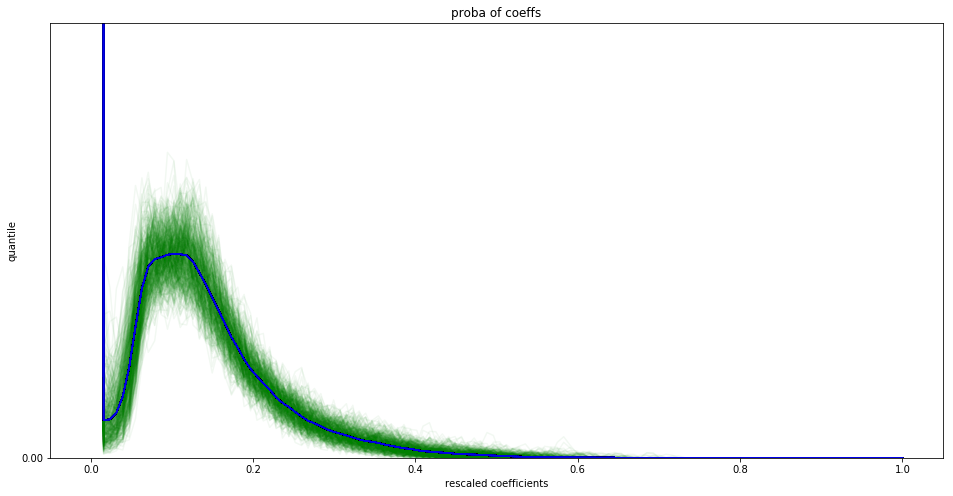

In [8]:
ymax=.002

fig, ax = plot_P_cum(p, ymin=0, ymax=ymax, verbose=False, title=None);
fig, ax = plot_P_cum(p_mean, ymin=0, ymax=ymax, fig=fig, ax=ax, c='b', verbose=False, title='proba of coeffs')
#ax.set_yscale('log')
#ax.set_xscale('log')

plt.show()

In [9]:
np.log2(2)

1.0

In [10]:
from shl_scripts import get_KL
get_KL(p_mean[0, :], p[0, :])

0.0009663583043641414

In [11]:
p.shape

(441, 128)

In [12]:
print('KL', np.array([p[i, :].sum() for i in range(P_cum.shape[0])] ))


KL [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.

In [13]:
print('KL', np.array([get_KL(p_mean[i, :], p[i, :]) for i in range(P_cum.shape[0])] ))
#print('KL', get_KL(p_mean, p))
print('KL', get_KL(p_mean, p, do_scipy=True))

KL [0.001  0.0015 0.0009 0.001  0.001  0.0019 0.001  0.0006 0.001  0.0014
 0.001  0.0008 0.0014 0.0011 0.0005 0.0011 0.0014 0.0015 0.0016 0.0012
 0.0017 0.001  0.0023 0.0015 0.0008 0.0022 0.0015 0.0015 0.0006 0.0011
 0.0016 0.0008 0.0008 0.0021 0.0014 0.0016 0.001  0.0007 0.0017 0.0012
 0.0014 0.0015 0.0015 0.0017 0.0013 0.001  0.0007 0.0009 0.0014 0.0015
 0.0009 0.0007 0.0008 0.0015 0.0015 0.001  0.001  0.0007 0.0016 0.0012
 0.0014 0.0006 0.0011 0.0014 0.0021 0.0016 0.0014 0.0009 0.0015 0.0011
 0.0012 0.0009 0.001  0.0016 0.0015 0.0013 0.0027 0.0015 0.0011 0.0015
 0.0013 0.0012 0.0013 0.0032 0.002  0.001  0.0012 0.0008 0.0014 0.0009
 0.0021 0.0016 0.0007 0.0011 0.0012 0.001  0.0011 0.002  0.0009 0.0017
 0.0014 0.0009 0.0008 0.0015 0.0011 0.0013 0.0012 0.0019 0.0011 0.0008
 0.0013 0.0008 0.001  0.001  0.0018 0.0013 0.0011 0.0011 0.0011 0.0008
 0.0009 0.0008 0.0013 0.001  0.0011 0.0013 0.001  0.0004 0.001  0.001
 0.0016 0.0012 0.0008 0.002  0.0009 0.0015 0.0015 0.001  0.0011 0.0012
 0.0

In [14]:
KL_ = np.array([get_KL(p_mean[i, :], p[i, :]) for i in range(P_cum.shape[0])] )
KL_

array([0.001 , 0.0015, 0.0009, 0.001 , 0.001 , 0.0019, 0.001 , 0.0006,
       0.001 , 0.0014, 0.001 , 0.0008, 0.0014, 0.0011, 0.0005, 0.0011,
       0.0014, 0.0015, 0.0016, 0.0012, 0.0017, 0.001 , 0.0023, 0.0015,
       0.0008, 0.0022, 0.0015, 0.0015, 0.0006, 0.0011, 0.0016, 0.0008,
       0.0008, 0.0021, 0.0014, 0.0016, 0.001 , 0.0007, 0.0017, 0.0012,
       0.0014, 0.0015, 0.0015, 0.0017, 0.0013, 0.001 , 0.0007, 0.0009,
       0.0014, 0.0015, 0.0009, 0.0007, 0.0008, 0.0015, 0.0015, 0.001 ,
       0.001 , 0.0007, 0.0016, 0.0012, 0.0014, 0.0006, 0.0011, 0.0014,
       0.0021, 0.0016, 0.0014, 0.0009, 0.0015, 0.0011, 0.0012, 0.0009,
       0.001 , 0.0016, 0.0015, 0.0013, 0.0027, 0.0015, 0.0011, 0.0015,
       0.0013, 0.0012, 0.0013, 0.0032, 0.002 , 0.001 , 0.0012, 0.0008,
       0.0014, 0.0009, 0.0021, 0.0016, 0.0007, 0.0011, 0.0012, 0.001 ,
       0.0011, 0.002 , 0.0009, 0.0017, 0.0014, 0.0009, 0.0008, 0.0015,
       0.0011, 0.0013, 0.0012, 0.0019, 0.0011, 0.0008, 0.0013, 0.0008,
      

(array([ 21., 118., 126.,  93.,  37.,  23.,  10.,   7.,   1.,   5.]),
 array([0.0004, 0.0007, 0.001 , 0.0013, 0.0016, 0.0019, 0.0022, 0.0025,
        0.0028, 0.0031, 0.0034]),
 <a list of 10 Patch objects>)

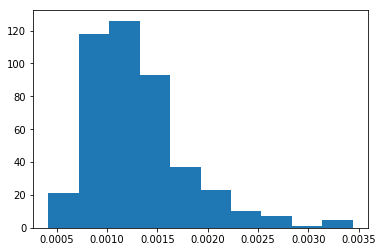

In [15]:
plt.hist(KL_)

In [16]:
print(KL_.mean())

0.0013090656535651739


## Kolmogorov Smirnov

In [17]:
dico_ = dico[homeo_method]
P_cum = dico_.P_cum
P_cum_mean = P_cum.mean(axis=0)[np.newaxis, :] * np.ones((shl.n_dictionary, shl.nb_quant))

from shl_scripts import get_KS

print(get_KS(P_cum_mean, P_cum))


[0.0245 0.0225 0.0164 0.0243 0.0203 0.0223 0.0195 0.0116 0.0307 0.022
 0.0179 0.0192 0.0224 0.0245 0.0111 0.0521 0.0224 0.0178 0.0322 0.0279
 0.0224 0.0424 0.0382 0.0345 0.0175 0.0358 0.0424 0.0239 0.0171 0.0233
 0.0275 0.012  0.0291 0.0423 0.0103 0.0188 0.0328 0.023  0.0236 0.0399
 0.0211 0.0358 0.0163 0.0347 0.0174 0.0119 0.0179 0.0273 0.0127 0.0332
 0.0159 0.0183 0.0282 0.0144 0.0258 0.0253 0.0312 0.0169 0.0202 0.0225
 0.0273 0.0281 0.0295 0.0192 0.038  0.0215 0.0394 0.0298 0.0134 0.0257
 0.0214 0.0297 0.023  0.0185 0.0544 0.0219 0.0442 0.0262 0.0149 0.0142
 0.0124 0.0191 0.0237 0.0315 0.0429 0.0261 0.0254 0.0171 0.0332 0.0198
 0.0402 0.0335 0.0213 0.0296 0.0164 0.0181 0.0166 0.0513 0.0255 0.0299
 0.0161 0.045  0.0431 0.0193 0.015  0.0149 0.0161 0.0329 0.0356 0.0238
 0.0142 0.0181 0.0232 0.015  0.0453 0.0336 0.0253 0.0253 0.0265 0.0251
 0.0231 0.0188 0.0118 0.0228 0.0108 0.0297 0.0243 0.0274 0.025  0.0158
 0.0169 0.0228 0.0213 0.0377 0.0148 0.0219 0.0525 0.0128 0.018  0.0287
 0.0531

## Factorization of the coefficients

🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶
🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶Non🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶
🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶
🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒


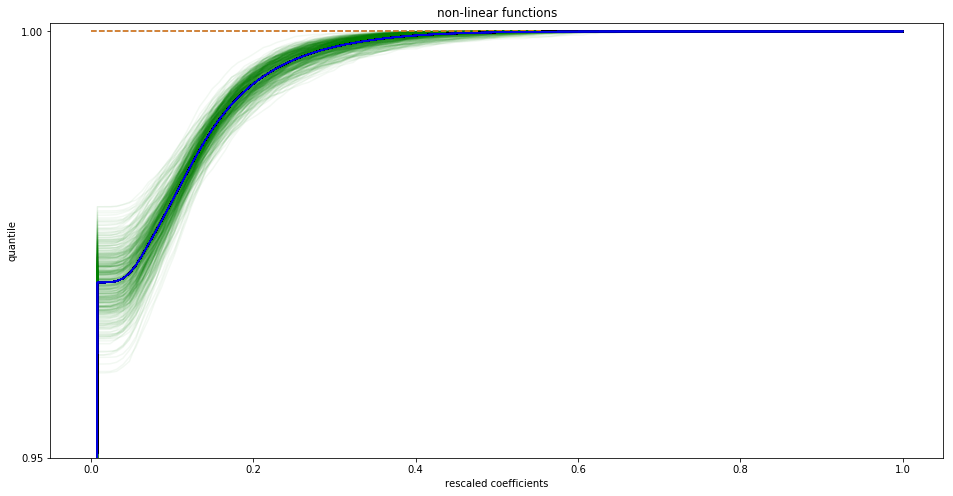

Perror[homeo_method] 27.117223014287212
🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶
🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶HAP🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶
🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶
🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒


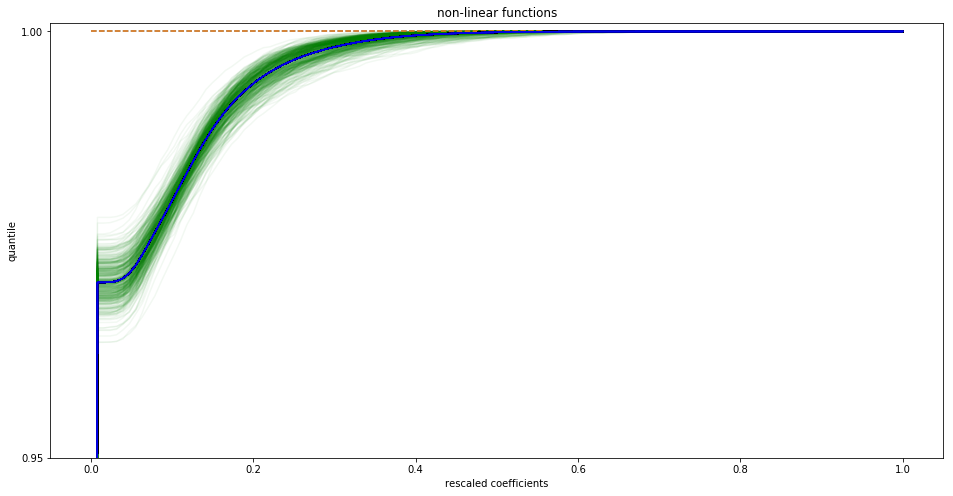

Perror[homeo_method] 23.95058627705105
🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶
🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶HEH🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶
🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶
🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒


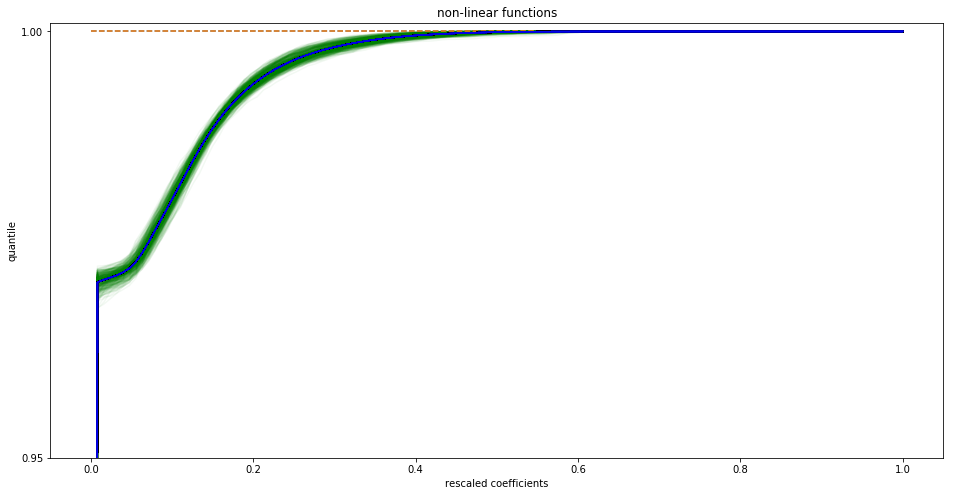

Perror[homeo_method] 11.122628502613818


In [18]:
Perror = {}
for homeo_method in homeo_methods:
    print(42*'🐶')
    print(15*'🐶' + homeo_method[:3] + 15*'🐶')
    print(42*'🐶')
    shl = SHL(homeo_method=homeo_method)
    dico_ = dico[homeo_method]
    print(42*'🐒')
 
    P_cum = dico_.P_cum
    #P_cum.shape

    from shl_scripts.shl_tools import plot_P_cum
    fig, ax = plot_P_cum(P_cum, verbose=False);
 
    P_cum_mean = P_cum.mean(axis=0)[np.newaxis, :] * np.ones((shl.n_dictionary, shl.nb_quant))
    fig, ax = plot_P_cum(P_cum_mean, fig=fig, ax=ax, c='b', verbose=False)
    plt.show()
    
    p_mean = np.gradient(P_cum_mean, axis=1)
    p = np.gradient(P_cum, axis=1)
    
    
    p /= p.sum(axis=-1)[:, None]
    p_mean /= p_mean.sum(axis=-1)[:, None]
    

#     Perror[homeo_method] = np.sum([get_KL(p_mean[i, :], p[i, :]) for i in range(P_cum.shape[0])] )
    
    from shl_scripts import get_KS

    Perror[homeo_method] = np.sum(get_KS(P_cum_mean, P_cum))
    
    print('Perror[homeo_method]', Perror[homeo_method])

In [19]:
Perror

{'None': 27.117223014287212,
 'HAP': 23.95058627705105,
 'HEH': 11.122628502613818}

## Version used

In [20]:
%load_ext version_information
%version_information numpy, shl_scripts, sklearn

Software versions
Python 3.6.5 64bit [GCC 4.2.1 Compatible Apple LLVM 9.1.0 (clang-902.0.39.1)]
IPython 6.4.0
OS Darwin 17.5.0 x86_64 i386 64bit
numpy 1.14.3
shl_scripts 20171221
sklearn 0.19.1
Fri May 18 09:05:01 2018 CEST